# Usage (details: phases)
Here, how to set phases in scenario analysis will be explained. As an example, use the records in India.

## Preperation

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
import covsirphy as cs
cs.__version__

'2.13.0-alpha.fix.417'

In [4]:
# Load datasets
data_loader = cs.DataLoader("input")
jhu_data = data_loader.jhu(verbose=False)
population_data = data_loader.population(verbose=False)
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [5]:
# Create instance of `Scenario` class
snl = cs.Scenario(jhu_data, population_data, country="India", province=None)

In [6]:
# Summarize main scenario
snl.summary()

""


Note:  
This is empty because no phases are registered. Term "phase" means a sequential dates in which the parameters of SIR-derived models are fixed. The details will be explained later.

Just for demonstration, we will fix the first/end date of the records here. This is un-necessary for your analysis.

In [7]:
# Fix the first date of records
snl.first_date = "01Mar2020"
# Fix the last date of records
snl.last_date = "16Jul2020"
# Summarize (Empty because no phases are registered)
snl.summary()

""


## Set phases with S-R trend analysis
How can we set phases?

Here, we will use "S-R trend analysis" explained in [S-R trend analysis section in "Kaggle: COVID-19 data with SIR model"](https://www.kaggle.com/lisphilar/covid-19-data-with-sir-model#S-R-trend-analysis). $S$ (Susceptible) and $R$ (Recovered) show the following relationship in SIR-derived models. $S_{(R)}$ means $S$ as a function of $R$.

$$S_{(R)} = N e^{-a R}$$

where $N$ is total population and $a=\cfrac{\beta}{N \gamma}$ is a constant.  
This leads to
$$\log S_{(R)} = - a R + \log N$$

$\log S$ decreases constantly with increase of $R$, when the records follow a SIR-derived model and the parameter values of the model are constant. With logarithmic y-axis scale, plot of $(x, y) = (R, S)$ shows a line. 

The slope of the line may change when the parameter values ($\beta$ and $\gamma$) are changed. To detect the dates when the parameter values were changed, we will find the change points of $\log S$ as a function of $R$, using [ruptures: change point detection in Python](https://github.com/deepcharles/ruptures). We call the period from a change point to the next change point as a "phase" in this analysis.

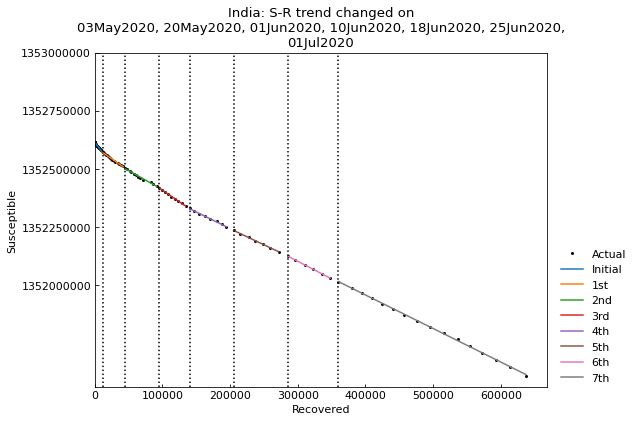

,Type,Start,End,Population
0th,Past,01Mar2020,02May2020,1352617328
1st,Past,03May2020,19May2020,1352617328
2nd,Past,20May2020,31May2020,1352617328
3rd,Past,01Jun2020,09Jun2020,1352617328
4th,Past,10Jun2020,17Jun2020,1352617328
5th,Past,18Jun2020,24Jun2020,1352617328
6th,Past,25Jun2020,30Jun2020,1352617328
7th,Past,01Jul2020,16Jul2020,1352617328


In [8]:
# Set phase with S-R trend analysis
snl.trend()
snl.summary()
# If necessary, initial (0th) phase can be disabled
# scenario.disable(phases=["0th"])

## (Optional) Remove un-necessary change points manually
The slope of 4th phase seems to equal to that of 3rd phase. Here, we will combine 3rd phase and 4th phase here and reset phase names.

In [9]:
# Before: 3rd is 12Jun2020-19Jun2020, 4th is 20Jun2020-29Jun2020
# After: 3rd is 12Jun2020-29Jun2020, 4th is the same as old 5th
snl.combine(phases=["3rd", "4th"])
snl.summary()

,Type,Start,End,Population
0th,Past,01Mar2020,02May2020,1352617328
1st,Past,03May2020,19May2020,1352617328
2nd,Past,20May2020,31May2020,1352617328
3rd,Past,01Jun2020,17Jun2020,1352617328
4th,Past,18Jun2020,24Jun2020,1352617328
5th,Past,25Jun2020,30Jun2020,1352617328
6th,Past,01Jul2020,16Jul2020,1352617328


Show the trend with manually set change points.

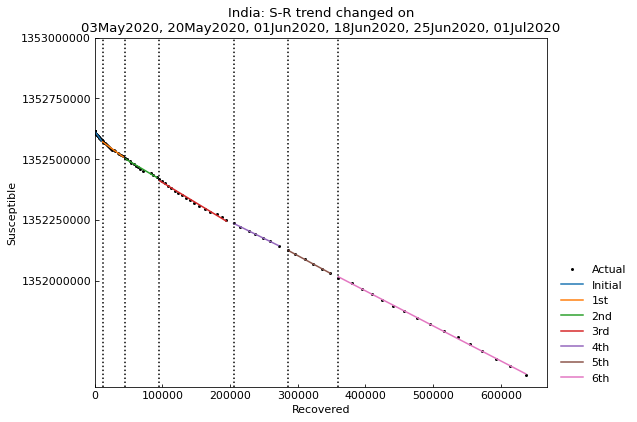

In [10]:
snl.trend(force=False)

## (Optional) Separate phases manually
Because point of $(x, y) = (S, R)$ jumped on 29May2020, we will separete the 1st phase with this change point and reset phase names.

In [11]:
# Before: 1st is 20May2020-02Jun2020
# After: 1st is 20May2020-28May2020, 2nd is 29May2020-02Jun2020
snl.separate(date="29May2020", phase="1st")
snl.summary()

,Type,Start,End,Population
0th,Past,01Mar2020,02May2020,1352617328
1st,Past,03May2020,19May2020,1352617328
2nd,Past,20May2020,28May2020,1352617328
3rd,Past,29May2020,31May2020,1352617328
4th,Past,01Jun2020,17Jun2020,1352617328
5th,Past,18Jun2020,24Jun2020,1352617328
6th,Past,25Jun2020,30Jun2020,1352617328
7th,Past,01Jul2020,16Jul2020,1352617328


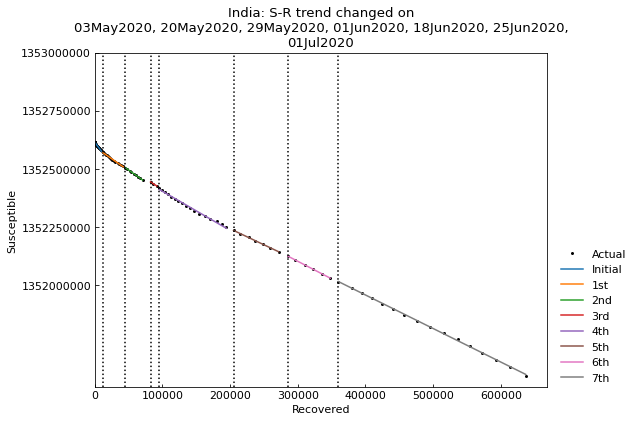

In [12]:
snl.trend(force=False)

## (Optional) Disable/enable phases manually
Phases can be disable for parameter eatimation. Disabled phases can be enabled with `Scenario.enable()` method.

In [13]:
# Disable 0th phase
snl.disable(phases=["0th"])
snl.summary()

,Type,Start,End,Population
1st,Past,03May2020,19May2020,1352617328
2nd,Past,20May2020,28May2020,1352617328
3rd,Past,29May2020,31May2020,1352617328
4th,Past,01Jun2020,17Jun2020,1352617328
5th,Past,18Jun2020,24Jun2020,1352617328
6th,Past,25Jun2020,30Jun2020,1352617328
7th,Past,01Jul2020,16Jul2020,1352617328


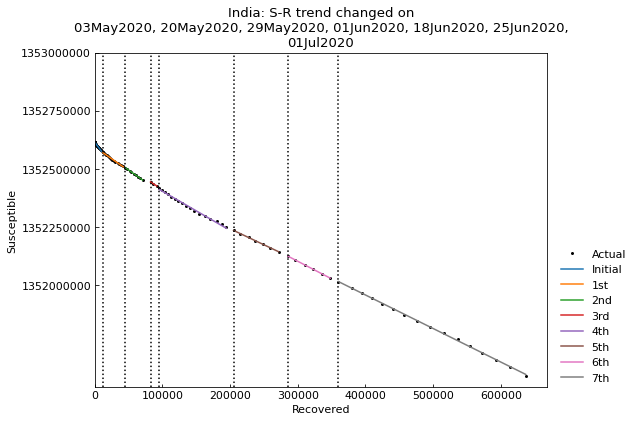

In [14]:
snl.trend(force=False)

In [15]:
# Enable 0th phase
snl.enable(phases=["0th"])
snl.summary()

,Type,Start,End,Population
0th,Past,01Mar2020,02May2020,1352617328
1st,Past,03May2020,19May2020,1352617328
2nd,Past,20May2020,28May2020,1352617328
3rd,Past,29May2020,31May2020,1352617328
4th,Past,01Jun2020,17Jun2020,1352617328
5th,Past,18Jun2020,24Jun2020,1352617328
6th,Past,25Jun2020,30Jun2020,1352617328
7th,Past,01Jul2020,16Jul2020,1352617328


## (Optional) Add phases one by one
In the previous sections, we started with S-R trend analysis. We can create phases without this analysis when you have a new idea to find change points.

In [16]:
# Clear all phases
snl.clear(include_past=True).summary()

""


In [17]:
# Set 0th phase to set the start date of 1st phase
snl.add(end_date="19May2020")
# Add 1st phase and disable 0th phase
snl.add(end_date="28May2020").disable(phases=["0th"])
# Add 2nd phase
snl.add(end_date="02Jun2020")
# Add 3rd phase
snl.add(end_date="11Jun2020")
# Add 4th phase
snl.add(end_date="29Jun2020")
# Add 5th phase to the last of the records
snl.add().summary()

,Type,Start,End,Population
1st,Past,20May2020,28May2020,1352617328
2nd,Past,29May2020,02Jun2020,1352617328
3rd,Past,03Jun2020,11Jun2020,1352617328
4th,Past,12Jun2020,29Jun2020,1352617328
5th,Past,30Jun2020,16Jul2020,1352617328


## Parameter estimation of ODE models
Here, we will use SIR-F model.

In [18]:
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 1st phase (03Jun2020 - 11Jun2020): finished  537 trials in 0 min 20 sec


	 3rd phase (30Jun2020 - 16Jul2020): finished  220 trials in 0 min 10 sec

	 4th phase (29May2020 - 02Jun2020): finished  209 trials in 0 min 10 sec

	 5th phase (20May2020 - 28May2020): finished  493 trials in 0 min 20 sec

	 2nd phase (12Jun2020 - 29Jun2020): finished 3499 trials in 3 min  0 sec

Completed optimization. Total: 3 min 21 sec


## Main scenario
To investigate the effect of parameter changes, we will perform scenario analysis. In the main scenario, we will assume that the parameter values do not change after the last past phase.

In [19]:
# Add 5th phase with the parameter values of 4th phase (until 01Aug2020)
snl.add(end_date="01Aug2020", name="Main")
# Add 6th phase with the parameter values of 4th phase (100 days)
snl.add(days=100, name="Main")
# Show the parameter values of SIR-F model and reproduction number
snl.summary(columns=["Start", "End", *cs.SIRF.PARAMETERS, "Rt"])

,Start,End,theta,kappa,rho,sigma,Rt
1st,20May2020,28May2020,0.000341,0.002123,0.090661,0.042733,2.02
2nd,29May2020,02Jun2020,0.018246,0.000581,0.089468,0.047135,1.84
3rd,03Jun2020,11Jun2020,0.025086,0.000266,0.080535,0.041859,1.86
4th,12Jun2020,29Jun2020,0.031297,0.000406,0.082981,0.058958,1.35
5th,30Jun2020,16Jul2020,0.016842,0.000329,0.095148,0.064400,1.45
6th,17Jul2020,01Aug2020,0.016842,0.000329,0.095148,0.064400,1.45
7th,02Aug2020,09Nov2020,0.016842,0.000329,0.095148,0.064400,1.45


## Medicine scenario
To investigate the effect of new medicines, we will assume that $\sigma$ will be double in the future phases in Medicine scenario.

In [20]:
# Initialize Medicine scenario
snl.clear(name="Medicine")
# Calculate double value of sigma (baseline: 4th phase)
sigma_opt = snl.get("sigma", phase="4th", name="Main") * 2
# Add 5th phase (until 01Aug2020, sigma: double)
snl.add(end_date="01Aug2020", name="Medicine", sigma=sigma_opt)
# Add 6th phase (100 days, sigma: double)
snl.add(days=100, name="Medicine", sigma=sigma_opt)
# Show the parameter values of SIR-F model and reproduction number
snl.summary(columns=["Start", "End", *cs.SIRF.PARAMETERS, "Rt"])

Start        End     theta     kappa       rho     sigma  \
Scenario Phase                                                                 
Main     1st    20May2020  28May2020  0.000341  0.002123  0.090661  0.042733   
         2nd    29May2020  02Jun2020  0.018246  0.000581  0.089468  0.047135   
         3rd    03Jun2020  11Jun2020  0.025086  0.000266  0.080535  0.041859   
         4th    12Jun2020  29Jun2020  0.031297  0.000406  0.082981  0.058958   
         5th    30Jun2020  16Jul2020  0.016842  0.000329  0.095148  0.064400   
         6th    17Jul2020  01Aug2020  0.016842  0.000329  0.095148  0.064400   
         7th    02Aug2020  09Nov2020  0.016842  0.000329  0.095148  0.064400   
Medicine 1st    20May2020  28May2020  0.000341  0.002123  0.090661  0.042733   
         2nd    29May2020  02Jun2020  0.018246  0.000581  0.089468  0.047135   
         3rd    03Jun2020  11Jun2020  0.025086  0.000266  0.080535  0.041859   
         4th    12Jun2020  29Jun2020  0.031297  0.000406  0.082981  0.058958   
         5th    30Jun2020  16Jul2020  0.016842  0.000329  0.095148  0.064400   
         6th    17Jul2020  01Aug2020  0.016842  0.000329  0.095148  0.117917   
         7th    02Aug2020  09Nov2020  0.016842  0.000329  0.095148  0.117917   

                  Rt  
Scenario Phase        
Main     1st    2.02  
         2nd    1.84  
         3rd    1.86  
         4th    1.35  
         5th    1.45  
         6th    1.45  
         7th    1.45  
Medicine 1st    2.02  
         2nd    1.84  
         3rd    1.86  
         4th    1.35  
         5th    1.45  
         6th    0.79  
         7th    0.79

## Compare the scenarios
Currently. we can compare the scenarios with the following indexes.
- max(Infected): max value of Infected
- argmax(Infected): the date when Infected shows max value
- Infected on ...: Infected on the end date of the last phase
- Fatal on ...: Fatal on the end date of the last phase

In [21]:
snl.describe()

,max(Infected),argmax(Infected),Confirmed on 10Nov2020,Infected on 10Nov2020,Fatal on 10Nov2020,6th_Rt,7th_Rt
Main,9442369,10Nov2020,31891834,9442369,654298,1.45,1.45
Medicine,359615,17Jul2020,2345283,20199,53138,0.79,0.79


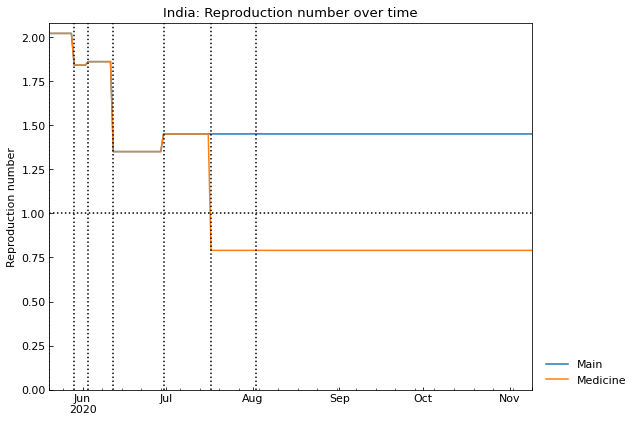

In [22]:
_ = snl.history(target="Rt")

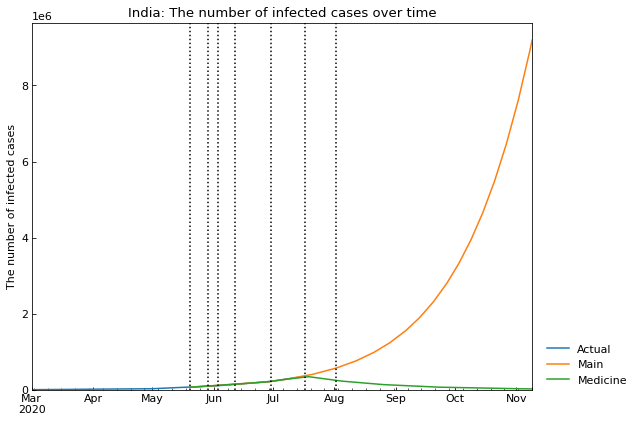

In [23]:
_ = snl.history(target="Infected")

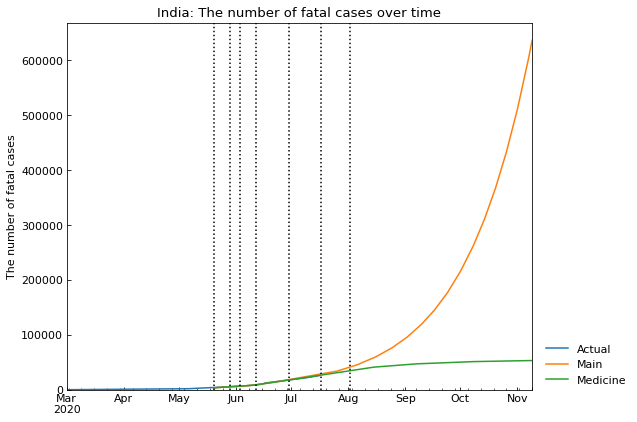

In [24]:
_ = snl.history(target="Fatal")